In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
df=pd.read_excel('flight_price.xlsx')
data_copy = df.copy()


df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [154]:
df.shape

(10683, 11)

In [155]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [156]:
##feature engineering
df['Date']=df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [158]:
df.drop(columns=['Date_of_Journey'], inplace=True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [160]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x: x.split(' ')[0])
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [161]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_minute']=df['Arrival_Time'].str.split(':').str[1]
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_minute']=df['Arrival_minute'].astype(int)
df.drop(columns=['Arrival_Time'], inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [162]:
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_minute']=df['Dep_Time'].str.split(':').str[1]
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_minute']=df['Dep_minute'].astype(int)
df.drop(columns=['Dep_Time'], inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Arrival_hour     10683 non-null  int64 
 12  Arrival_minute   10683 non-null  int64 
 13  Dep_hour         10683 non-null  int64 
 14  Dep_minute       10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [164]:
char = df['Duration']

# Extract hours and minutes using regex, fill missing with 0, and convert to int
hours = char.str.extract(r'(\d+)h').fillna(0).astype(int)[0]
minutes = char.str.extract(r'(\d+)m').fillna(0).astype(int)[0]

# Example: print(hours, minutes)
hours, minutes


df['Duration_hours'] = hours
df['Duration_minutes'] = minutes
df['totalDurationmins'] = (df['Duration_hours'] * 60) + df['Duration_minutes']

In [165]:
df.drop(columns=['Duration'], inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,totalDurationmins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45,285


In [166]:
# def extract_hour(x):
# 	if 'h' in x:
# 		return int(x.split('h')[0].strip())
# 	else:
# 		return 0

# def extract_minute(x):
# 	if 'm' in x:
# 		return int(x.split('h')[-1].replace('m', '').strip()) if 'm' in x else 0
# 	else:
# 		return 0

# df['duration_hour'] = df['Duration'].apply(extract_hour)
# df['duration_minute'] = df['Duration'].apply(extract_minute)

In [167]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [168]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,totalDurationmins
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,6,5,2019,9,25,9,45,23,40,1420


In [169]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3,'4 stops': 4,np.nan:1})

In [170]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [171]:
df.isna().sum()

Airline              0
Source               0
Destination          0
Route                1
Total_Stops          0
Additional_Info      0
Price                0
Date                 0
Month                0
Year                 0
Arrival_hour         0
Arrival_minute       0
Dep_hour             0
Dep_minute           0
Duration_hours       0
Duration_minutes     0
totalDurationmins    0
dtype: int64

In [172]:
df.drop(columns=['Route'], inplace=True)

In [173]:
df.isna().sum()

Airline              0
Source               0
Destination          0
Total_Stops          0
Additional_Info      0
Price                0
Date                 0
Month                0
Year                 0
Arrival_hour         0
Arrival_minute       0
Dep_hour             0
Dep_minute           0
Duration_hours       0
Duration_minutes     0
totalDurationmins    0
dtype: int64

In [174]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,totalDurationmins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,2019,22,25,19,55,2,30,150
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,2019,23,20,20,45,2,35,155
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,2019,11,20,8,20,3,0,180
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,2019,14,10,11,30,2,40,160


In [176]:
# df['Duration'].str.split(' ').str[0].str.split('h').str[0].astype(int)
#df.drop(columns=['Duration'], inplace=True)



In [177]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes,totalDurationmins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,19,0,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,5,25,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,4,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,2019,22,25,19,55,2,30,150
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,2019,23,20,20,45,2,35,155
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,2019,11,20,8,20,3,0,180
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,2019,14,10,11,30,2,40,160


In [178]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [179]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

Text(0, 0.5, 'Number of Flights')

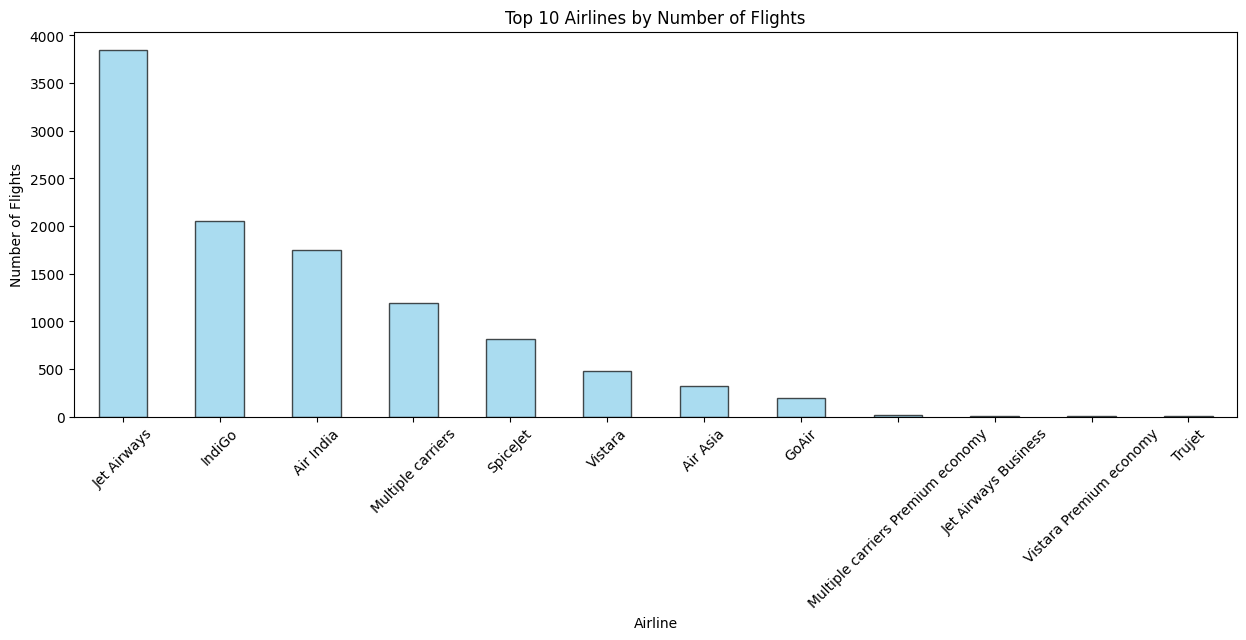

In [ ]:
df['Airline'].value_counts().plot(kind='bar', figsize=(15, 5),
                                   color='skyblue', edgecolor='black',
                                     linewidth=1, alpha=0.7,)
plt.xticks(rotation=45)
plt.title('Top 10 Airlines by Number of Flights')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')

Text(0.5, 1.0, 'Top 10 Destinations by Number of Flights')

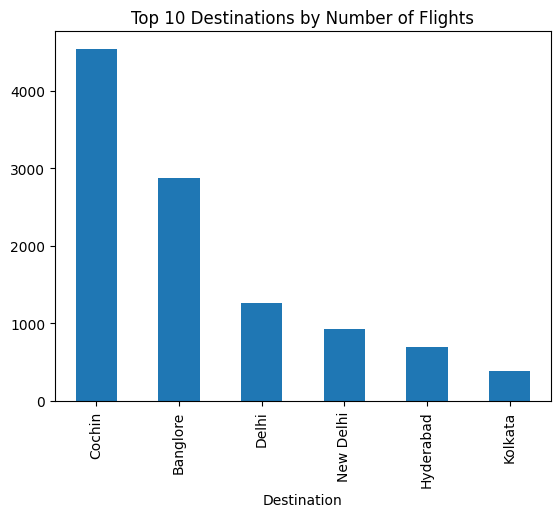

In [181]:
df['Destination'].value_counts().plot(kind='bar')
plt.title('Top 10 Destinations by Number of Flights')

Text(0, 0.5, 'Airline')

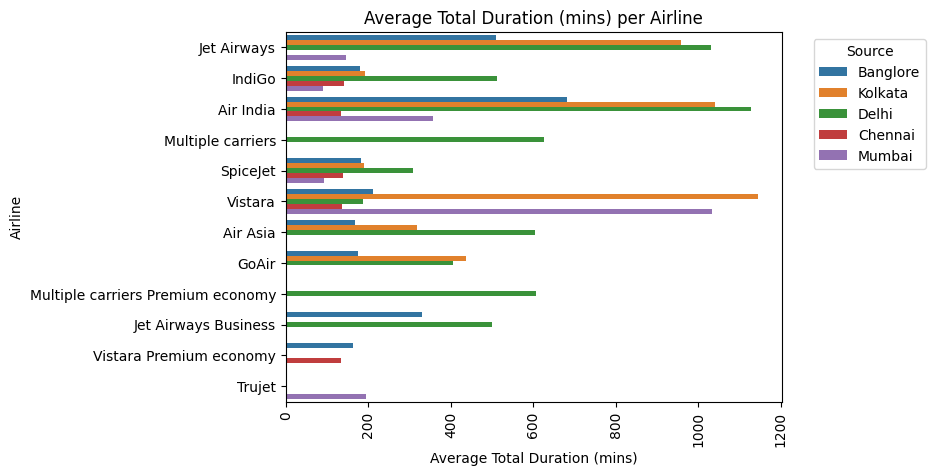

In [ ]:
sns.barplot(x='totalDurationmins', y='Airline', data=df,
            hue='Source', order=df['Airline'].value_counts().index, errorbar=None,)


plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title('Average Total Duration (mins) per Airline')
plt.xlabel('Average Total Duration (mins)')
plt.ylabel('Airline')